<a href="https://colab.research.google.com/github/DavidSchneider47/National-TOD-Atlas/blob/main/TOD_Score_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated.csv')

In [ ]:
df.head()

,Facility ID,Indicator,Building Count,Building Footprint,Walk Score,Amenities,Designated Land Use,Cluster,Cluster Name,Facility Name,...,Decade Built,Proximity,Proximity Score,TOD Score,2020 Population,2020 Housing Units,2010 Population,2010 Housing Units,Population Change,Housing Change
0,168,1,141,64336,22,0,0,1,Low Density Suburban,Lakeline Station,...,2001-2010,No proximiate Stations,1,0.235,4129,2557,1446,1051,42.77%,143.29%
1,170,1,46,75696,16,3,1,0,Sparse Suburban,Howard Station,...,2001-2010,No proximiate Stations,1,0.172,166,102,161,94,-48.45%,8.51%
2,172,1,145,102943,14,0,2,3,Emerging Mixed-Use,Leander Station,...,2001-2010,No proximiate Stations,1,0.156,2038,1067,2703,1231,-62.30%,-13.32%
3,178,1,272,138297,20,7,2,3,Emerging Mixed-Use,Crestview Station,...,2001-2010,No proximiate Stations,1,0.253,2028,1784,1359,1081,-25.39%,65.03%
4,179,1,244,304792,25,25,1,4,Mixed-Use Urban,Downtown Station,...,2011-2020,No proximiate Stations,1,0.383,2219,1549,1364,821,-18.66%,88.67%


In [ ]:
df.shape

(3802, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Facility ID          3802 non-null   int64  
 1   Indicator            3802 non-null   int64  
 2   Building Count       3802 non-null   int64  
 3   Building Footprint   3802 non-null   int64  
 4   Walk Score           3802 non-null   int64  
 5   Amenities            3802 non-null   int64  
 6   Designated Land Use  3802 non-null   int64  
 7   Cluster              3802 non-null   int64  
 8   Cluster Name         3802 non-null   object 
 9   Facility Name        3802 non-null   object 
 10  Transit Agency Name  3802 non-null   object 
 11  Primary Mode Served  3802 non-null   object 
 12  Facility Type        3802 non-null   object 
 13  Mode_Type            3802 non-null   object 
 14  System Type          3802 non-null   object 
 15  Decade Built         3802 non-null   o

## **TOD Score by Cluster**

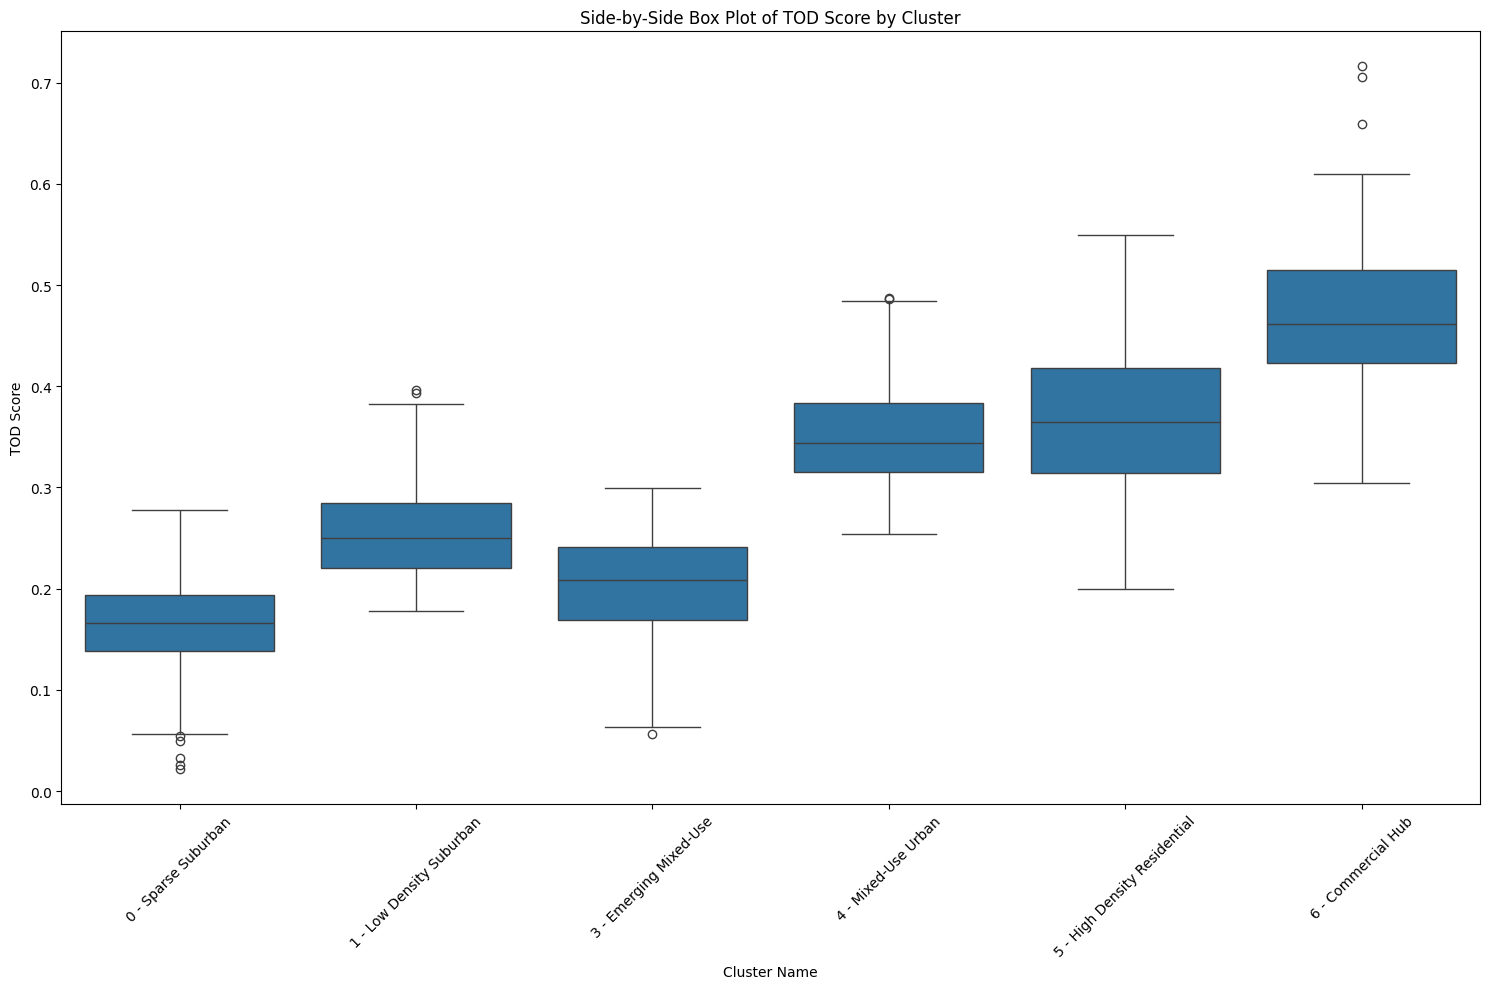

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated.csv')  # Replace 'your_file.csv' with your file path

# Clean column names if necessary (remove leading and trailing spaces)
data.columns = data.columns.str.strip()

# Combine the cluster number and name into a single column for plotting
# This assumes 'Cluster' is the numerical category and 'Cluster Name' is the categorical name
data['Cluster_Order'] = data['Cluster'].astype(str) + ' - ' + data['Cluster Name']

# Now sort the DataFrame based on 'Cluster' to ensure correct ordering in the plot
data_sorted = data.sort_values(by='Cluster')

# Create a side-by-side box plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.boxplot(x='Cluster_Order', y='TOD Score', data=data_sorted)
plt.title('Side-by-Side Box Plot of TOD Score by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('TOD Score')
plt.xticks(rotation=45)  # Rotate the cluster names for better readability if needed
plt.tight_layout()  # Adjusts plot parameters to give some padding

# Show the plot
plt.show()


# **TOD Score by Age of Station**

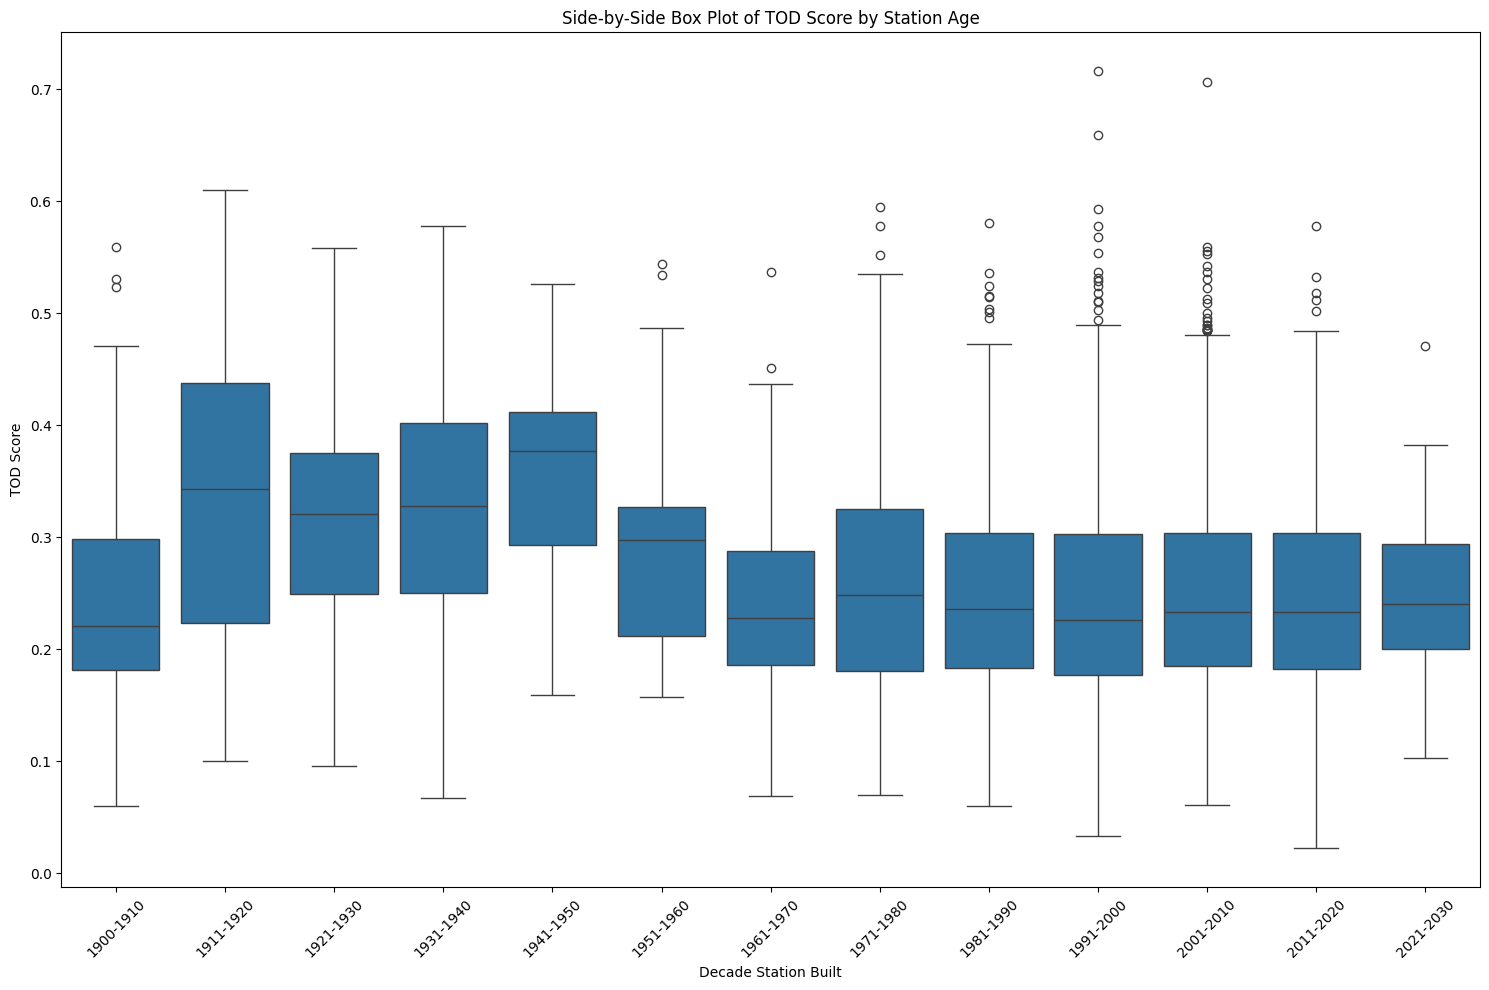

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv')  # Replace 'your_file.csv' with your file path

# Clean column names if necessary (remove leading and trailing spaces)
data.columns = data.columns.str.strip()

# Now sort the DataFrame based on 'Cluster' to ensure correct ordering in the plot
data_sorted = data.sort_values(by='Decade Built')

# Create a side-by-side box plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.boxplot(x='Decade Built', y='TOD Score', data=data_sorted)
plt.title('Side-by-Side Box Plot of TOD Score by Station Age')
plt.xlabel('Decade Station Built')
plt.ylabel('TOD Score')
plt.xticks(rotation=45)  # Rotate the cluster names for better readability if needed
plt.tight_layout()  # Adjusts plot parameters to give some padding

# Show the plot
plt.show()


## **TOD Score and Cluster Descriptive Statistics**

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated.csv')  # Replace 'your_file.csv' with your file path

# Clean column names if necessary (remove leading and trailing spaces)
data.columns = data.columns.str.strip()

# Ensure 'Cluster' is of type category and ordered correctly
data['Cluster'] = pd.Categorical(data['Cluster'], categories=sorted(data['Cluster'].unique()), ordered=True)

# Group by both 'Cluster' and 'Cluster Name', assuming they have a one-to-one mapping
# If not, you might need to sort or map these correctly
grouped_data = data.groupby(['Cluster', 'Cluster Name'])['TOD Score'].describe()

# Reset index if you want 'Cluster' and 'Cluster Name' back as columns
grouped_data.reset_index(inplace=True)

# Display the descriptive statistics
grouped_data


,Cluster,Cluster Name,count,mean,std,min,25%,50%,75%,max
0,0,Sparse Suburban,960.0,0.164566,0.040898,0.022,0.13800,0.1660,0.19400,0.278
1,1,Low Density Suburban,887.0,0.254576,0.043402,0.178,0.22000,0.2500,0.28500,0.396
2,3,Emerging Mixed-Use,838.0,0.203739,0.048048,0.056,0.16900,0.2090,0.24100,0.299
3,4,Mixed-Use Urban,553.0,0.350177,0.048915,0.254,0.31500,0.3440,0.38300,0.487
4,5,High Density Residential,390.0,0.367087,0.070965,0.200,0.31425,0.3650,0.41775,0.549
5,6,Commercial Hub,174.0,0.469103,0.067880,0.304,0.42250,0.4615,0.51450,0.716


## **Top 10 Stations with the Highest TOD Score**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv')  # Replace 'your_file_name.csv' with the path to your actual file

# Sort the DataFrame based on the 'TOD Score' column in descending order
sorted_df = df.sort_values(by='TOD Score', ascending=False)

# Select the top 10 facilities and the specified columns
top_10_facilities = sorted_df.head(20)[[
    'Facility ID',
    'Facility Name',
    'Transit Agency Name',
    'Primary Mode Served',
    'Facility Type',
    'Decade Built',
    'System Type',
    'Cluster Name',
    'TOD Score'
]]

# Print the top 10 facilities table
top_10_facilities


,Facility ID,Facility Name,Transit Agency Name,Primary Mode Served,Facility Type,Decade Built,System Type,Cluster Name,TOD Score
679,2391,Spring St - LEX,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1991-2000,Legacy Heavy Rail,Commercial Hub,0.716
325,2000,Prince St - BWY,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,2001-2010,Legacy Heavy Rail,Commercial Hub,0.706
513,2212,Broadwayâ€“Lafayette Street/Bleecker Street,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1991-2000,Legacy Heavy Rail,Commercial Hub,0.659
403,2086,Bowery - NAS,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1911-1920,Legacy Heavy Rail,Commercial Hub,0.610
319,1993,49 St - BWY,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1971-1980,Legacy Heavy Rail,Commercial Hub,0.595
596,2300,34 St - BW7,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1991-2000,Legacy Heavy Rail,Commercial Hub,0.593
597,2301,28 St - BW7,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1981-1990,Legacy Heavy Rail,Commercial Hub,0.580
236,1206,PENN STATION,MTA Long Island Rail Road,Commuter Rail,Underground Fixed Guideway Station,2011-2020,Commuter Rail,Commercial Hub,0.578
1390,5376,"Passenger Station, Powell St., M30, 12000277",San Francisco Bay Area Rapid Transit District,Heavy Rail,Underground Fixed Guideway Station,1971-1980,Post-War Subway,Commercial Hub,0.578
515,2214,2 Av - 6AV,MTA New York City Transit,Heavy Rail,Underground Fixed Guideway Station,1931-1940,Legacy Heavy Rail,Commercial Hub,0.578


# **Stations with Highest Potential Score**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (2).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Facility ID          3802 non-null   int64  
 1   Indicator            3802 non-null   int64  
 2   Building Count       3802 non-null   int64  
 3   Building Footprint   3802 non-null   int64  
 4   Walk Score           3802 non-null   int64  
 5   Amenities            3802 non-null   int64  
 6   Designated Land Use  3802 non-null   int64  
 7   Cluster              3802 non-null   int64  
 8   Cluster Name         3802 non-null   object 
 9   Facility Name        3802 non-null   object 
 10  Transit Agency Name  3802 non-null   object 
 11  Primary Mode Served  3802 non-null   object 
 12  Facility Type        3802 non-null   object 
 13  Mode_Type            3802 non-null   object 
 14  System Type          3802 non-null   object 
 15  Decade Built         3802 non-null   o

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (2).csv')  # Replace 'your_file_name.csv' with the path to your actual file

# Sort the DataFrame based on the 'TOD Score' column in descending order
sorted_df = df.sort_values(by='TOD_Potential_Score', ascending=False)

# Select the top 10 facilities and the specified columns
top_10_facilities = sorted_df.head(20)[[
    'Facility ID',
    'Facility Name',
    'Transit Agency Name',
    'Primary Mode Served',
    'Facility Type',
    'Decade Built',
    'System Type',
    'Cluster Name',
    'TOD_Potential_Score'
]]

# Print the top 10 facilities table
top_10_facilities


KeyError: 'TOD_Potential_Score'

## **Agencies with the Highest Average TOD Score**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv')

# Group by 'Transit Agency Name' and calculate the mean (or max) TOD Score for each agency,
# and count the unique 'Facility ID' values for each agency
agency_scores = df.groupby('Transit Agency Name').agg({
    'TOD Score': 'mean',  # or 'max'
    'System Type': 'first',  # Assumes all entries for a single agency have the same System Type
    'Facility ID': pd.Series.nunique  # Counts unique Facility IDs
}).reset_index()

# Sort the agencies based on the 'TOD Score' column in descending order
sorted_agencies = agency_scores.sort_values(by='TOD Score', ascending=False)

# Select the top agencies and the specified columns
top_agencies = sorted_agencies.head(10)[['Transit Agency Name', 'TOD Score', 'System Type', 'Facility ID']]

# Print the top agencies table
top_agencies


,Transit Agency Name,TOD Score,System Type,Facility ID
9,City and County of San Francisco,0.421000,20th Century Rail,9
46,Port Authority Trans-Hudson Corporation,0.419538,Legacy Heavy Rail,13
31,MTA New York City Transit,0.379993,Legacy Heavy Rail,424
27,King County Department of Metro Transit,0.375720,Modern Streetcar,25
15,City of Milwaukee,0.367176,Modern Streetcar,17
12,City of Cincinnati,0.342562,Modern Streetcar,16
8,Chicago Transit Authority,0.340786,Legacy Heavy Rail,145
7,Central Puget Sound Regional Transit Authority,0.300972,21st Century Rail,36
24,Greater Richmond Transit Company,0.289280,Bus Rapid Transit,25
0,Alameda-Contra Costa Transit District,0.286737,Bus Rapid Transit,38


# **Adjusting to Exclude Agencies with Fewer than 10 Stations**

In [ ]:
import pandas as pd
# Load the CSV file
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv')

# Group by 'Transit Agency Name' and calculate the mean (or max) TOD Score for each agency,
# and count the unique 'Facility ID' values for each agency
agency_scores = df.groupby('Transit Agency Name').agg({
    'TOD Score': 'mean',  # or 'max'
    'System Type': 'first',  # Assumes all entries for a single agency have the same System Type
    'Facility ID': pd.Series.nunique  # Counts unique Facility IDs
}).reset_index()

# Filter out agencies with fewer than 10 unique Facility IDs
filtered_agency_scores = agency_scores[agency_scores['Facility ID'] >= 10]

# Sort the filtered agencies based on the 'TOD Score' column in ascending order
sorted_agencies = filtered_agency_scores.sort_values(by='TOD Score', ascending=False)

# Select the top (in this context, bottom based on TOD score) agencies and the specified columns
bottom_agencies = sorted_agencies.head(20)[['Transit Agency Name', 'TOD Score', 'System Type', 'Facility ID']]

# Print the top (bottom) agencies table
bottom_agencies


,Transit Agency Name,TOD Score,System Type,Facility ID
46,Port Authority Trans-Hudson Corporation,0.419538,Legacy Heavy Rail,13
31,MTA New York City Transit,0.379993,Legacy Heavy Rail,424
27,King County Department of Metro Transit,0.375720,Modern Streetcar,25
15,City of Milwaukee,0.367176,Modern Streetcar,17
12,City of Cincinnati,0.342562,Modern Streetcar,16
8,Chicago Transit Authority,0.340786,Legacy Heavy Rail,145
7,Central Puget Sound Regional Transit Authority,0.300972,21st Century Rail,36
24,Greater Richmond Transit Company,0.289280,Bus Rapid Transit,25
0,Alameda-Contra Costa Transit District,0.286737,Bus Rapid Transit,38
34,Metro Transit,0.285068,21st Century Rail,44


# **Agenices with the Lowest TOD Score**

In [ ]:
# prompt:

import pandas as pd
# Load the CSV file
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv')

# Group by 'Transit Agency Name' and calculate the mean (or max) TOD Score for each agency,
# and count the unique 'Facility ID' values for each agency
agency_scores = df.groupby('Transit Agency Name').agg({
    'TOD Score': 'mean',  # or 'max'
    'System Type': 'first',  # Assumes all entries for a single agency have the same System Type
    'Facility ID': pd.Series.nunique  # Counts unique Facility IDs
}).reset_index()

# Sort the agencies based on the 'TOD Score' column in ascending order
sorted_agencies = agency_scores.sort_values(by='TOD Score', ascending=True)

# Select the top agencies and the specified columns
bottom_agencies = sorted_agencies.head(10)[['Transit Agency Name', 'TOD Score', 'System Type', 'Facility ID']]

# Print the top agencies table
bottom_agencies


,Transit Agency Name,TOD Score,System Type,Facility ID
50,Riverside County Transportation Commission,0.154500,Commuter Rail,2
21,Denton County Transportation Authority,0.164600,Commuter Rail,5
57,South Florida Regional Transportation Authority,0.168778,Commuter Rail,18
13,City of El Paso,0.172111,Modern Streetcar,27
3,Bi-State Development Agency of the Missouri-Il...,0.179974,20th Century Rail,38
18,Connecticut Department of Transportation - CTT...,0.183000,Bus Rapid Transit,1
35,"Metro-North Commuter Railroad Company, dba: MT...",0.191566,Commuter Rail,83
23,Fort Worth Transportation Authority,0.191909,Commuter Rail,11
40,North County Transit District,0.198037,Commuter Rail,27
59,Southern California Regional Rail Authority,0.198871,Commuter Rail,62


# **Bottom Tier of Agencies with 10 or more Stations**

In [ ]:
import pandas as pd
# Load the CSV file
df = pd.read_csv('/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv')

# Group by 'Transit Agency Name' and calculate the mean (or max) TOD Score for each agency,
# and count the unique 'Facility ID' values for each agency
agency_scores = df.groupby('Transit Agency Name').agg({
    'TOD Score': 'mean',  # or 'max'
    'System Type': 'first',  # Assumes all entries for a single agency have the same System Type
    'Facility ID': pd.Series.nunique  # Counts unique Facility IDs
}).reset_index()

# Filter out agencies with fewer than 10 unique Facility IDs
filtered_agency_scores = agency_scores[agency_scores['Facility ID'] >= 10]

# Sort the filtered agencies based on the 'TOD Score' column in ascending order
sorted_agencies = filtered_agency_scores.sort_values(by='TOD Score', ascending=True)

# Select the top (in this context, bottom based on TOD score) agencies and the specified columns
bottom_agencies = sorted_agencies.head(20)[['Transit Agency Name', 'TOD Score', 'System Type', 'Facility ID']]

# Print the top (bottom) agencies table
bottom_agencies


,Transit Agency Name,TOD Score,System Type,Facility ID
57,South Florida Regional Transportation Authority,0.168778,Commuter Rail,18
13,City of El Paso,0.172111,Modern Streetcar,27
3,Bi-State Development Agency of the Missouri-Il...,0.179974,20th Century Rail,38
35,"Metro-North Commuter Railroad Company, dba: MT...",0.191566,Commuter Rail,83
23,Fort Worth Transportation Authority,0.191909,Commuter Rail,11
40,North County Transit District,0.198037,Commuter Rail,27
59,Southern California Regional Rail Authority,0.198871,Commuter Rail,62
51,Roaring Fork Transportation Authority,0.199600,Bus Rapid Transit,10
52,Sacramento Regional Transit District,0.200636,20th Century Rail,44
17,Connecticut Department of Transportation,0.200652,Commuter Rail,46


# **Linear Regression-Primary Mode Served**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Preprocessing: Handling categorical variables using one-hot encoding
categorical_features = ['Primary Mode Served']
one_hot_encoder = OneHotEncoder()

# Define the transformer for the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

# Define the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Preparing the data for the regression model
X = filtered_data[categorical_features]
y = filtered_data['TOD Score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.007923826058371702
R-squared (R²): 0.19549873092782788


# **Facility Type**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Preprocessing: Handling categorical variables using one-hot encoding
categorical_features = ['Facility Type']
one_hot_encoder = OneHotEncoder()

# Define the transformer for the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

# Define the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Preparing the data for the regression model
X = filtered_data[categorical_features]
y = filtered_data['TOD Score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.007415340672186338
R-squared (R²): 0.24712494476408176


## **Linear Regression on TOD Sore-Mode and Facility**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Preprocessing: Handling categorical variables using one-hot encoding
categorical_features = ['Primary Mode Served', 'Facility Type']
one_hot_encoder = OneHotEncoder()

# Define the transformer for the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

# Define the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Preparing the data for the regression model
X = filtered_data[categorical_features]
y = filtered_data['TOD Score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.007065814081308564
R-squared (R²): 0.2862315311314242


# **Mode_Type**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Preprocessing: Handling the categorical variable using one-hot encoding
categorical_features = ['Mode_Type']
one_hot_encoder = OneHotEncoder()

# Define the transformer for the categorical variable
preprocessor_mode = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

# Define the regression model pipeline
model_mode = Pipeline(steps=[('preprocessor', preprocessor_mode),
                             ('regressor', LinearRegression())])

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Preparing the data for the regression model
X_mode = filtered_data[categorical_features]
y = filtered_data['TOD Score']

# Splitting the data into training and testing sets
X_mode_train, X_mode_test, y_train, y_test = train_test_split(X_mode, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model_mode.fit(X_mode_train, y_train)

# Making predictions on the test set
y_mode_pred = model_mode.predict(X_mode_test)

# Calculating the model performance metrics
mse_mode = mean_squared_error(y_test, y_mode_pred)
r2_mode = r2_score(y_test, y_mode_pred)

# Printing the performance metrics
print(f'Mean Squared Error (MSE) for Mode_Type model: {mse_mode}')
print(f'R-squared (R²) for Mode_Type model: {r2_mode}')


Mean Squared Error (MSE) for Mode_Type model: 0.006894475118298887
R-squared (R²) for Mode_Type model: 0.30353970650621387


## **Mode, Facility, Decade Built**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Determine if "Decade Built" is categorical and set up preprocessing
if data['Decade Built'].dtype == 'object':
    categorical_features_mod = ['Primary Mode Served', 'Facility Type', 'Decade Built']
    preprocessor_mod = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features_mod)
        ])
else:
    categorical_features_mod = ['Primary Mode Served', 'Facility Type']
    numerical_features_mod = ['Decade Built']
    preprocessor_mod = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features_mod),
            ('num', 'passthrough', numerical_features_mod)
        ])

# Define the regression model pipeline for the modified model
model_mod = Pipeline(steps=[('preprocessor', preprocessor_mod),
                            ('regressor', LinearRegression())])

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Preparing the data for the regression model
X_mod = filtered_data[categorical_features_mod] if 'Decade Built' in categorical_features_mod else filtered_data[categorical_features_mod + numerical_features_mod]
y = filtered_data['TOD Score']

# Splitting the data into training and testing sets
X_mod_train, X_mod_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model_mod.fit(X_mod_train, y_train)

# Making predictions on the test set
y_mod_pred = model_mod.predict(X_mod_test)

# Calculating the model performance metrics
mse_mod = mean_squared_error(y_test, y_mod_pred)
r2_mod = r2_score(y_test, y_mod_pred)

# Printing the performance metrics
print(f'Mean Squared Error (MSE) for modified model: {mse_mod}')
print(f'R-squared (R²) for modified model: {r2_mod}')


Mean Squared Error (MSE) for modified model: 0.006986160000475502
R-squared (R²) for modified model: 0.294277960129004


# **Mode_Type, Decade Built**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)



In [ ]:
# Now we will perform linear regression using "Mode_Type" and "Decade Built" as the independent variables
# and "TOD Score" as the target variable. We will continue to handle "Mode_Type" as a categorical variable.

# Updating the preprocessor for these specific variables
if 'Decade Built' in categorical_features_mod:  # If "Decade Built" is still treated as categorical
    preprocessor_final = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built'])
        ])
else:  # "Decade Built" treated as numerical
    preprocessor_final = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['Mode_Type']),
            ('num', 'passthrough', ['Decade Built'])
        ])

# Define the regression model pipeline for this final model
model_final = Pipeline(steps=[('preprocessor', preprocessor_final),
                              ('regressor', LinearRegression())])

# Preparing the data for this final regression model
X_final = filtered_data[['Mode_Type']] if 'Decade Built' not in categorical_features_mod else filtered_data[['Mode_Type', 'Decade Built']]

# Splitting the data into training and testing sets
X_final_train, X_final_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Fitting the model to the training data
model_final.fit(X_final_train, y_train)

# Making predictions on the test set
y_final_pred = model_final.predict(X_final_test)

# Calculating and printing the model performance metrics for this final model
mse_final = mean_squared_error(y_test, y_final_pred)
r2_final = r2_score(y_test, y_final_pred)
(mse_final, r2_final)


(0.006853705964583146, 0.3076580906145264)

## **Ridge Regression, Mode_Type, Decade Built-Best Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical variables
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built'])  # Both 'Mode_Type' and 'Decade Built' are treated as categorical
    ])

# Define the Ridge regression model pipeline
model_ridge = Pipeline(steps=[('preprocessor', preprocessor_ridge),
                              ('regressor', Ridge())])

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built']]  # Independent variables
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model to the training data
model_ridge.fit(X_train, y_train)

# Make predictions with the Ridge regression model on the test set
y_pred = model_ridge.predict(X_test)

# Calculate and print out the performance metrics for the Ridge regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.0068491728712887145
R-squared (R²): 0.30811601082340423


# **Regression, Mode_Type, System Type**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical variables
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'System Type'])  # 'Mode_Type' and 'System Type' are treated as categorical
    ])

# Define the linear regression model pipeline
model_linear = Pipeline(steps=[('preprocessor', preprocessor_linear),
                               ('regressor', LinearRegression())])

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'System Type']]  # Independent variables
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
model_linear.fit(X_train, y_train)

# Make predictions with the linear regression model on the test set
y_pred = model_linear.predict(X_test)

# Calculate and print out the performance metrics for the linear regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.006642240485746678
R-squared (R²): 0.3290197326434252


## **Primary Mode Served, Facility Type, System Type**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Updated (1).csv'  # Replace 'your_file_path_here.csv' with the actual file path
data = pd.read_csv(file_path)

# Ensure that the data is filtered to exclude rows with NaN values for the TOD Score
filtered_data = data.dropna(subset=['TOD Score'])

# Setting up preprocessing for categorical variables
# Here, 'Primary Mode Served', 'Facility Type', and 'System Type' are all treated as categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Primary Mode Served', 'Facility Type', 'System Type'])
    ])

# Define the linear regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Prepare the data for regression
X = filtered_data[['Primary Mode Served', 'Facility Type', 'System Type']]  # Independent variables
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model to the training data
model.fit(X_train, y_train)

# Make predictions with the linear regression model on the test set
y_pred = model.predict(X_test)

# Calculate and print out the performance metrics for the linear regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.006750147127314777
R-squared (R²): 0.31811931020851325


# **Identify Coliniarity between Mode_Type and System Type**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming 'data' is your DataFrame
X = data[['Mode_Type', 'System Type']]  # Independent variables

# One-hot encode the categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Mode_Type', 'System Type']))

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_encoded.columns
vif_data['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

vif_data


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Mode_Type_Bus Rapid Transit-At-Grade Fixed Gui...,inf
1,Mode_Type_Bus Rapid Transit-Exclusive Platform...,inf
2,Mode_Type_Bus Rapid Transit-Simple At-Grade Pl...,inf
3,Mode_Type_Bus Rapid Transit-Underground Fixed ...,inf
4,Mode_Type_Commuter Rail-At-Grade Fixed Guidewa...,inf
5,Mode_Type_Commuter Rail-Elevated Fixed Guidewa...,inf
6,Mode_Type_Commuter Rail-Exclusive Platform Sta...,inf
7,Mode_Type_Commuter Rail-Simple At-Grade Platfo...,inf
8,Mode_Type_Commuter Rail-Underground Fixed Guid...,inf
9,Mode_Type_Heavy Rail-At-Grade Fixed Guideway S...,inf


## **Identify any Colinearity between Mode_Type and "Decade Built**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming 'data' is your DataFrame
X = data[['Mode_Type', 'Decade Built']]  # Independent variables

# One-hot encode the categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Mode_Type', 'Decade Built']))

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_encoded.columns
vif_data['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

vif_data


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Mode_Type_Bus Rapid Transit-At-Grade Fixed Gui...,inf
1,Mode_Type_Bus Rapid Transit-Exclusive Platform...,inf
2,Mode_Type_Bus Rapid Transit-Simple At-Grade Pl...,inf
3,Mode_Type_Bus Rapid Transit-Underground Fixed ...,inf
4,Mode_Type_Commuter Rail-At-Grade Fixed Guidewa...,inf
5,Mode_Type_Commuter Rail-Elevated Fixed Guidewa...,inf
6,Mode_Type_Commuter Rail-Exclusive Platform Sta...,inf
7,Mode_Type_Commuter Rail-Simple At-Grade Platfo...,inf
8,Mode_Type_Commuter Rail-Underground Fixed Guid...,inf
9,Mode_Type_Heavy Rail-At-Grade Fixed Guideway S...,inf


# **Analyzing Network Size vs. TOD Score**

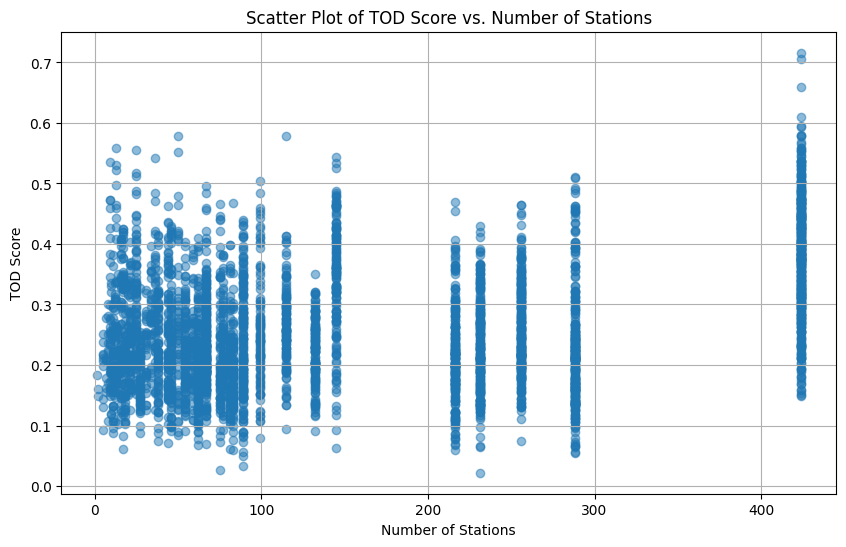

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'your_file_path_here.csv' with the path of your CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenents.csv'
data = pd.read_csv(file_path)



# Assuming 'Number of Stations' and 'TOD Score' are the exact column names in your CSV
x = data['Number of Stations ']  # Replace this with your actual column name for the number of stations
y = data['TOD Score']  # Replace this with your actual column name for the TOD Score

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(x, y, alpha=0.5)  # Create a scatter plot; adjust alpha for point transparency
plt.title('Scatter Plot of TOD Score vs. Number of Stations')  # Add a title
plt.xlabel('Number of Stations')  # Label the x-axis
plt.ylabel('TOD Score')  # Label the y-axis
plt.grid(True)  # Add a grid for easier reading
plt.show()  # Display the plot


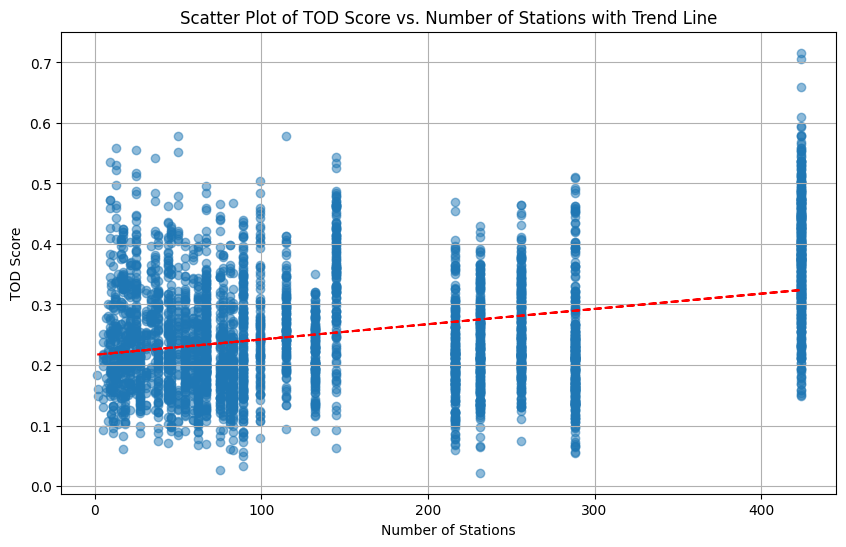

Correlation coefficient between TOD Score and Number of Stations: 0.327


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenents.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Data for plotting
x = data['Number of Stations ']  # Replace with your actual column name
y = data['TOD Score']  # Replace with your actual column name

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # Alpha controls the transparency

# Adding a trend line
z = np.polyfit(x, y, 1)  # Get the coefficients of the best fit line
p = np.poly1d(z)  # Create the polynomial object representing the best fit line
plt.plot(x, p(x), "r--")  # Plot the trend line in red dashed format

# Adding labels and title
plt.title('Scatter Plot of TOD Score vs. Number of Stations with Trend Line')
plt.xlabel('Number of Stations')
plt.ylabel('TOD Score')
plt.grid(True)

# Display the plot
plt.show()

# Compute and print the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]  # Get the Pearson correlation coefficient
print(f'Correlation coefficient between TOD Score and Number of Stations: {correlation_coefficient:.3f}')


# **Add Number of Stations and Category to Regression Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenents.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical and numerical variables
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built']),  # Categorical variables
        ('num', 'passthrough', ['Number of Stations '])  # Numerical variable
    ])

# Define the Ridge regression model pipeline
model_ridge = Pipeline(steps=[('preprocessor', preprocessor_ridge),
                              ('regressor', Ridge())])

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built', 'Number of Stations ']]  # Independent variables
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model to the training data
model_ridge.fit(X_train, y_train)

# Make predictions with the Ridge regression model on the test set
y_pred = model_ridge.predict(X_test)

# Calculate and print out the performance metrics for the Ridge regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.006621688357394134
R-squared (R²): 0.3277039844538553


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenents.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical variables, now including "Network Size Category"
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built', 'Network Size Category'])  # Added 'Network Size Category' as a categorical variable
    ])

# Define the Ridge regression model pipeline
model_ridge = Pipeline(steps=[('preprocessor', preprocessor_ridge),
                              ('regressor', Ridge())])

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built', 'Network Size Category']]  # Updated to include 'Network Size Category'
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model to the training data
model_ridge.fit(X_train, y_train)

# Make predictions with the Ridge regression model on the test set
y_pred = model_ridge.predict(X_test)

# Calculate and print out the performance metrics for the Ridge regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.006703103063610527
R-squared (R²): 0.31943799855389665


# **Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Changed from Ridge to RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical variables, now including "Network Size Category"
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built', 'Network Size Category'])  # Added 'Network Size Category' as a categorical variable
    ])

# Define the Random Forest regression model pipeline
model_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                           ('regressor', RandomForestRegressor(random_state=42))])  # Using RandomForestRegressor

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built', 'Network Size Category']]  # Updated to include 'Network Size Category'
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest regression model to the training data
model_rf.fit(X_train, y_train)

# Make predictions with the Random Forest regression model on the test set
y_pred = model_rf.predict(X_test)

# Calculate and print out the performance metrics for the Random Forest regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.005930834940051333
R-squared (R²): 0.3978459142363653


# **Feature Importance**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical variables, now including "Network Size Category"
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built', 'Network Size Category'])  # Added 'Network Size Category' as a categorical variable
    ])

# Define the Random Forest regression model pipeline
model_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                           ('regressor', RandomForestRegressor(random_state=42))])  # Using RandomForestRegressor

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built', 'Network Size Category']]  # Updated to include 'Network Size Category'
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest regression model to the training data
model_rf.fit(X_train, y_train)

# Make predictions with the Random Forest regression model on the test set
y_pred = model_rf.predict(X_test)

# Calculate and print out the performance metrics for the Random Forest regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Retrieve feature importances from the regressor and match them to column names
feature_importances = model_rf.named_steps['regressor'].feature_importances_
# Get feature names after transformation
encoded_feature_names = model_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()
# Combine with feature importances
importances = zip(encoded_feature_names, feature_importances)
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)

# Print out the feature importances in descending order
print("Feature importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


Mean Squared Error (MSE): 0.005930834940051333
R-squared (R²): 0.3978459142363653
Feature importances:
Mode_Type_Heavy Rail-Underground Fixed Guideway Station: 0.35006768744321903
Mode_Type_Heavy Rail-Elevated Fixed Guideway Station: 0.11117809736054113
Network Size Category_First Quartile: 0.06262643677956292
Network Size Category_Second Quartile: 0.04567746985823569
Mode_Type_Commuter Rail-At-Grade Fixed Guideway Station: 0.043565667930233636
Network Size Category_Fourth Quartile: 0.03679116253146589
Decade Built_1991-2000: 0.030701751896733007
Mode_Type_Light Rail-Underground Fixed Guideway Station: 0.029544370122903296
Decade Built_2001-2010: 0.025281073057599808
Decade Built_1971-1980: 0.021734383538218452
Mode_Type_Light Rail-Exclusive Platform Station: 0.021076836611560013
Decade Built_1981-1990: 0.02032969626182018
Decade Built_2011-2020: 0.0188432522212983
Network Size Category_Third Quartile: 0.01654544812102718
Decade Built_1911-1920: 0.015685900100943232
Mode_Type_Streetcar

# **Increase the Number of Estimators**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenentsv1.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical variables, now including "Network Size Category"
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built', 'Network Size Category'])  # Categorical variables
    ])

# Define the Random Forest regression model pipeline, adjust n_estimators here
n_estimators = 200  # You can change this value
model_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                           ('regressor', RandomForestRegressor(n_estimators=n_estimators, random_state=42))])

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built', 'Network Size Category']]  # Independent variables
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest regression model to the training data
model_rf.fit(X_train, y_train)

# Make predictions with the Random Forest regression model on the test set
y_pred = model_rf.predict(X_test)

# Calculate and print out the performance metrics for the Random Forest regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.005932272748319575
R-squared (R²): 0.39769993443216933


# **Look at Number of Counties and TOD Score**

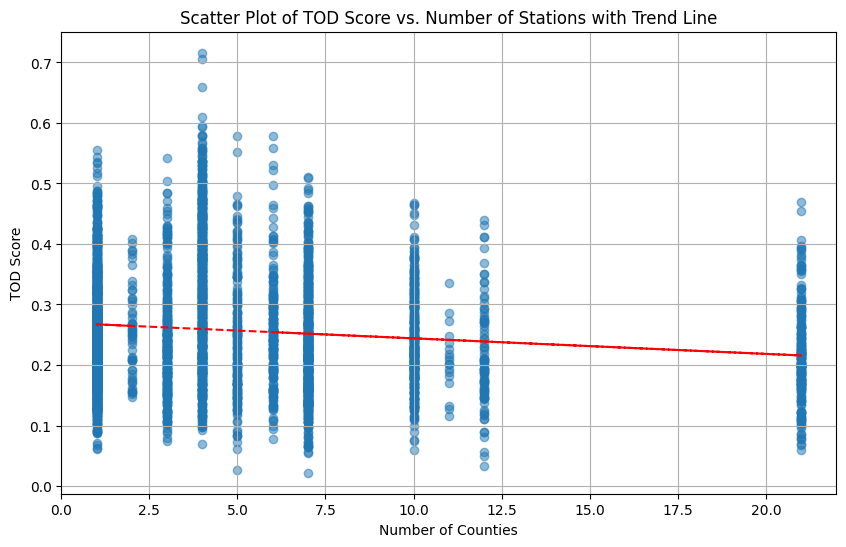

Correlation coefficient between TOD Score and Number of Stations: -0.128


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenents.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Data for plotting
x = data['Counties']  # Replace with your actual column name
y = data['TOD Score']  # Replace with your actual column name

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # Alpha controls the transparency

# Adding a trend line
z = np.polyfit(x, y, 1)  # Get the coefficients of the best fit line
p = np.poly1d(z)  # Create the polynomial object representing the best fit line
plt.plot(x, p(x), "r--")  # Plot the trend line in red dashed format

# Adding labels and title
plt.title('Scatter Plot of TOD Score vs. Number of Stations with Trend Line')
plt.xlabel('Number of Counties')
plt.ylabel('TOD Score')
plt.grid(True)

# Display the plot
plt.show()

# Compute and print the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]  # Get the Pearson correlation coefficient
print(f'Correlation coefficient between TOD Score and Number of Stations: {correlation_coefficient:.3f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_path = '/content/FINAL_Clusters_TOD_Score_Pop_Change_Indepdenents.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Filter out rows where TOD Score is NaN
filtered_data = data.dropna(subset=['TOD Score'])

# Set up preprocessing for categorical and numerical variables
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Mode_Type', 'Decade Built']),  # Categorical variables
        ('num', 'passthrough', ['Counties'])  # Numerical variable
    ])

# Define the Ridge regression model pipeline
model_ridge = Pipeline(steps=[('preprocessor', preprocessor_ridge),
                              ('regressor', Ridge())])

# Prepare the data for regression
X = filtered_data[['Mode_Type', 'Decade Built', 'Counties']]  # Independent variables
y = filtered_data['TOD Score']  # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model to the training data
model_ridge.fit(X_train, y_train)

# Make predictions with the Ridge regression model on the test set
y_pred = model_ridge.predict(X_test)

# Calculate and print out the performance metrics for the Ridge regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.006771538559763807
R-squared (R²): 0.31248978400459704


# **More TOD Score Regression**

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data from the CSV file
file_path = '/content/TOD Score Regression.csv'  # Replace 'path_to_your_file' with the actual file path
data = pd.read_csv(file_path)

# List of categorical columns for one-hot encoding
categorical_columns = ['Primary Mode Served', 'Facility Type', 'Mode_Type',
                       'System Type', 'Decade Built', 'Network Size Category',
                       'County Size Category', 'Cities Size Category']

# One-hot encode the specified categorical variables
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the modified dataframe
encoded_data.head()


,Cluster,Number of Stations,Counties,Number of Cities,TOD Score,Primary Mode Served_Bus Rapid Transit,Primary Mode Served_Commuter Rail,Primary Mode Served_Heavy Rail,Primary Mode Served_Hybrid Rail,Primary Mode Served_Light Rail,...,Network Size Category_Second Quartile,Network Size Category_Third Quartile,County Size Category_First Quartile,County Size Category_Fourth Quartile,County Size Category_Second Quartile,County Size Category_Third Quartile,Cities Size Category_First Quartile,Cities Size Category_Fourth Quartile,Cities Size Category_Second Quartile,Cities Size Category_Third Quartile
0,6,424,4,8,0.716,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6,424,4,8,0.706,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,6,424,4,8,0.659,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,6,424,4,8,0.610,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,6,424,4,8,0.595,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


# **Correlation and Multicolinearity**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'encoded_data' is your one-hot encoded dataset

# Separate features and target variable
X = encoded_data.drop('TOD Score', axis=1)  # Predictor variables
y = encoded_data['TOD Score']  # Target variable

# Standardize the features before calculating VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Compute and display correlation with target variable
correlations = X.corrwith(y)
print("Correlations with TOD Score:\n", correlations.sort_values(ascending=False))

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print("\nVIF values:\n", vif_data.sort_values(by='VIF', ascending=False))

# Suggest to remove features based on VIF values and low correlation
features_to_remove = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
low_corr_features = correlations[correlations.abs() < 0.01].index.tolist()  # Adjust the threshold as necessary
print("\nSuggested features to remove based on VIF:", features_to_remove)
"Suggested features to remove based on low correlation with TOD Score:", low_corr_features


Correlations with TOD Score:
 Cluster                                                    0.719230
Facility Type_Underground Fixed Guideway Station           0.450726
Mode_Type_Heavy Rail-Underground Fixed Guideway Station    0.428220
Primary Mode Served_Heavy Rail                             0.418056
Cities Size Category_Second Quartile                       0.369849
                                                             ...   
Cities Size Category_Third Quartile                       -0.204185
System Type_Commuter Rail                                 -0.213561
Mode_Type_Commuter Rail-At-Grade Fixed Guideway Station   -0.268595
Primary Mode Served_Commuter Rail                         -0.274454
Facility Type_At-Grade Fixed Guideway Station             -0.358872
Length: 73, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF values:
                                               feature          VIF
72               Cities Size Category_Third Quartile           inf
45                       System Type_Modern Streetcar          inf
35  Mode_Type_Light Rail-Underground Fixed Guidewa...          inf
40                      System Type_20th Century Rail          inf
41                      System Type_21st Century Rail          inf
..                                                ...          ...
57                             Decade Built_1991-2000  1284.558940
3                                    Number of Cities    23.097199
1                                 Number of Stations     23.011497
2                                            Counties    13.671385
0                                             Cluster     1.398295

[73 rows x 2 columns]

Suggested features to remove based on VIF: ['Number of Stations ', 'Counties', 'Number of Cities', 'Primary Mode Served_Bus Rapid Transit', 'Primary Mode Serv

('Suggested features to remove based on low correlation with TOD Score:',
 ['Primary Mode Served_Bus Rapid Transit',
  'Facility Type_Exclusive Platform Station',
  'Mode_Type_Bus Rapid Transit-Exclusive Platform Station',
  'Mode_Type_Hybrid Rail-Elevated Fixed Guideway Station',
  'Mode_Type_Hybrid Rail-Exclusive Platform Station',
  'Mode_Type_Streetcar Rail-At-Grade Fixed Guideway Station',
  'System Type_Post-War Subway',
  'Decade Built_1971-1980'])

In [ ]:
low_corr_features = correlations[correlations.abs() < 0.01].index.tolist()


In [ ]:
print(len(low_corr_features))


8


## **A closer look at multicolinearrity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Filter features with VIF over 10
high_vif_features = vif_data[vif_data['VIF'] > 10]

# Display the features with VIF over 10 and their corresponding VIF values
print("Features with VIF over 10:")
high_vif_features


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with VIF over 10:


,Feature,VIF
1,Number of Stations,2.301150e+01
2,Counties,1.367139e+01
3,Number of Cities,2.309720e+01
4,Primary Mode Served_Bus Rapid Transit,6.171539e+05
5,Primary Mode Served_Commuter Rail,1.247690e+05
...,...,...
68,County Size Category_Third Quartile,4.021083e+03
69,Cities Size Category_First Quartile,5.869528e+04
70,Cities Size Category_Fourth Quartile,7.597418e+04
71,Cities Size Category_Second Quartile,3.983792e+03


In [ ]:
# Define the file path for storing the CSV file
output_file_path = '/content/high_vif_features.csv'

# Save the DataFrame as a CSV file
high_vif_features.to_csv(output_file_path, index=False)




# **Initial Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable for linear regression
X_lr = encoded_data.drop('TOD Score', axis=1)  # Features
y_lr = encoded_data['TOD Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_model.predict(X_test)

# Calculate and print the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0037554872996860313
R-squared: 0.6332820395820911


## **Cross Fold Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Prepare the features and target variable
X_lr = encoded_data.drop('TOD Score', axis=1)  # Features
y_lr = encoded_data['TOD Score']  # Target variable

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform 10-fold cross-validation for R-squared (R²) score
cv_r2_scores = cross_val_score(linear_model, X_lr, y_lr, cv=10, scoring='r2')

# Perform 10-fold cross-validation for Mean Squared Error (MSE) score
# Note: MSE is returned as negative by cross_val_score for it to be a 'greater is better' score,
# so we'll negate it to interpret it correctly as MSE.
cv_mse_scores = cross_val_score(linear_model, X_lr, y_lr, cv=10, scoring='neg_mean_squared_error')

# Calculate and print the average R2 and MSE from the cross-validation
average_cv_r2 = cv_r2_scores.mean()
average_cv_mse = -cv_mse_scores.mean()  # Convert negative MSE to positive

print(f'Average R² from 10-fold CV: {average_cv_r2}')
print(f'Average MSE from 10-fold CV: {average_cv_mse}')


Average R² from 10-fold CV: -35.18623720061579
Average MSE from 10-fold CV: 0.005056493363817707


# **Remove features with low correlations to TOD Score**

In [ ]:
# Identify features with a correlation with the TOD Score of less than 0.01
low_correlation_features = correlations[correlations.abs() < 0.01].index.tolist()

# Remove these features from the dataset
reduced_data = encoded_data.drop(columns=low_correlation_features)

# Prepare the updated features and target variable for further analysis
X_reduced = reduced_data.drop('TOD Score', axis=1)  # Updated Features
y_reduced = reduced_data['TOD Score']  # Target Variable


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare the reduced features and target variable for Ridge regression
X_reduced = reduced_data.drop('TOD Score', axis=1)  # Updated Features
y_reduced = reduced_data['TOD Score']  # Target Variable

# Split the reduced feature set into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Initialize and fit the Ridge regression model
# Note: Alpha (regularization strength) is set to 1.0 by default, but can be adjusted
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_reduced_scaled, y_train_reduced)

# Make predictions on the testing set
y_pred_reduced = ridge_model.predict(X_test_reduced_scaled)

# Calculate and print the model performance metrics
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)

print(f'Mean Squared Error (MSE): {mse_reduced}')
print(f'R-squared (R²): {r2_reduced}')


Mean Squared Error (MSE): 0.0037550581181308323
R-squared (R²): 0.6333239485467637


# **Second Cross Fold Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Create a Ridge regression model within a pipeline that includes feature scaling
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# Perform 10-fold cross-validation for R-squared (R²) score
cv_r2_scores_reduced = cross_val_score(ridge_pipeline, X_reduced, y_reduced, cv=10, scoring='r2')

# Perform 10-fold cross-validation for Mean Squared Error (MSE) score
# Note: MSE is returned as negative by cross_val_score to make it a 'greater is better' score,
# so we'll negate it to interpret it correctly as MSE.
cv_mse_scores_reduced = cross_val_score(ridge_pipeline, X_reduced, y_reduced, cv=10, scoring='neg_mean_squared_error')

# Calculate the average R2 and MSE from the cross-validation
average_cv_r2_reduced = cv_r2_scores_reduced.mean()
average_cv_mse_reduced = -cv_mse_scores_reduced.mean()  # Convert negative MSE to positive

print(f'Average R² from 10-fold CV on reduced model: {average_cv_r2_reduced}')
print(f'Average MSE from 10-fold CV on reduced model: {average_cv_mse_reduced}')


Average R² from 10-fold CV on reduced model: -35.17480572297333
Average MSE from 10-fold CV on reduced model: 0.005055443282924764


# **Identifying Highly Correlated Features**

In [ ]:
# Calculate the correlation matrix for the reduced features
correlation_matrix_reduced = X_reduced.corr()

# Identify pairs of features that are highly correlated with each other (above a certain threshold, e.g., 0.8)
high_correlation_pairs = [(i, j) for i in correlation_matrix_reduced.columns for j in correlation_matrix_reduced.columns
                          if i != j and abs(correlation_matrix_reduced.loc[i, j]) > 0.8]

# Print out the pairs of highly correlated features
for pair in high_correlation_pairs:
    print(pair)


('Number of Stations ', 'Network Size Category_Fourth Quartile')
('Number of Cities', 'Cities Size Category_Fourth Quartile')
('Primary Mode Served_Hybrid Rail', 'Mode_Type_Hybrid Rail-At-Grade Fixed Guideway Station')
('Primary Mode Served_Streetcar Rail', 'Mode_Type_Streetcar Rail-Simple At-Grade Platform Station')
('Primary Mode Served_Streetcar Rail', 'System Type_Modern Streetcar')
('Facility Type_Underground Fixed Guideway Station', 'Mode_Type_Heavy Rail-Underground Fixed Guideway Station')
('Mode_Type_Heavy Rail-Underground Fixed Guideway Station', 'Facility Type_Underground Fixed Guideway Station')
('Mode_Type_Hybrid Rail-At-Grade Fixed Guideway Station', 'Primary Mode Served_Hybrid Rail')
('Mode_Type_Streetcar Rail-Simple At-Grade Platform Station', 'Primary Mode Served_Streetcar Rail')
('Mode_Type_Streetcar Rail-Simple At-Grade Platform Station', 'System Type_Modern Streetcar')
('System Type_Legacy Heavy Rail', 'Network Size Category_Fourth Quartile')
('System Type_Modern Str

In [ ]:
# Calculate the correlation matrix for the reduced features
correlation_matrix_reduced = X_reduced.corr()

# Identify pairs of features that are highly correlated with each other (above a certain threshold, e.g., 0.8)
high_correlation_pairs = [(i, j) for i in correlation_matrix_reduced.columns for j in correlation_matrix_reduced.columns
                          if i != j and abs(correlation_matrix_reduced.loc[i, j]) > 0.8]

# Extract unique features from the high correlation pairs
unique_highly_correlated_features = set()
for pair in high_correlation_pairs:
    # Add each feature in the pair to the set of unique features
    unique_highly_correlated_features.update(pair)

# Count the number of unique highly correlated features
num_unique_highly_correlated_features = len(unique_highly_correlated_features)
print(f'Number of unique features involved in highly correlated pairs: {num_unique_highly_correlated_features}')


Number of unique features involved in highly correlated pairs: 14


# **Ridge Regression without Highly Correlated Features**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# List of one feature from each highly correlated pair to be removed
features_to_remove = [
    'Network Size Category_Fourth Quartile',  # Remove one from each pair
    'Cities Size Category_Fourth Quartile',
    'Mode_Type_Hybrid Rail-At-Grade Fixed Guideway Station',
    'Mode_Type_Streetcar Rail-Simple At-Grade Platform Station',
    'System Type_Modern Streetcar',
    'Facility Type_Underground Fixed Guideway Station',  # or 'Mode_Type_Heavy Rail-Underground Fixed Guideway Station'
    'County Size Category_First Quartile',  # or 'Cities Size Category_First Quartile'
    'Number of Cities'
]

# Remove these features from the reduced dataset
X_reduced_final = X_reduced.drop(columns=features_to_remove)

# Split the further reduced feature set into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_reduced_final, y_reduced, test_size=0.2, random_state=42)

# Standardize the features
scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(X_train_final)
X_test_final_scaled = scaler_final.transform(X_test_final)

# Initialize and fit the Ridge regression model to the new reduced dataset
ridge_model_final = Ridge(alpha=1.0)
ridge_model_final.fit(X_train_final_scaled, y_train_final)

# Make predictions on the testing set using the new model
y_pred_final = ridge_model_final.predict(X_test_final_scaled)

# Calculate and print the new model performance metrics
mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

print(f'Mean Squared Error: {mse_final}')
print(f'R-squared: {r2_final}')


Mean Squared Error: 0.00374289118488394
R-squared: 0.6345120321664885


In [ ]:
# Count the number of features used in the model
number_of_features = X_train_final.shape[1]
print(f'Number of features used in the model: {number_of_features}')


Number of features used in the model: 57


# **Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Prepare the further reduced features and target variable
X_final = X_reduced_final
y_final = y_reduced

# Create a pipeline that standardizes the data then applies Ridge regression
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# Perform 10-fold cross-validation for R-squared (R²) score
cv_r2_scores_final = cross_val_score(ridge_pipeline, X_final, y_final, cv=10, scoring='r2')

# Perform 10-fold cross-validation for Mean Squared Error (MSE) score
# Note: MSE is returned as negative by cross_val_score to make it a 'greater is better' score,
# so we'll negate it to interpret it correctly as MSE.
cv_mse_scores_final = cross_val_score(ridge_pipeline, X_final, y_final, cv=10, scoring='neg_mean_squared_error')

# Calculate and print the average R2 and MSE from the cross-validation
average_cv_r2_final = cv_r2_scores_final.mean()
average_cv_mse_final = -cv_mse_scores_final.mean()  # Convert negative MSE to positive

print(f'Average R² from 10-fold CV: {average_cv_r2_final}')
print(f'Average MSE from 10-fold CV: {average_cv_mse_final}')


Average R² from 10-fold CV: -35.128271836283936
Average MSE from 10-fold CV: 0.005054404231763081
